<a href="https://colab.research.google.com/github/mark3000-010701/Dataanalyst/blob/main/b%C3%A0i_t%E1%BA%ADp_H%E1%BB%93i_Quy_tuy%E1%BA%BFn_t%C3%ADnh_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Bài tập] Xây dựng mô hình hồi quy tuyến tính dự báo doanh thu theo số tiền quảng cáo**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/03/10172251/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Vẽ đồ thị để trực quan hóa mối quan hệ giữa các loại quảng cáo và doanh thu

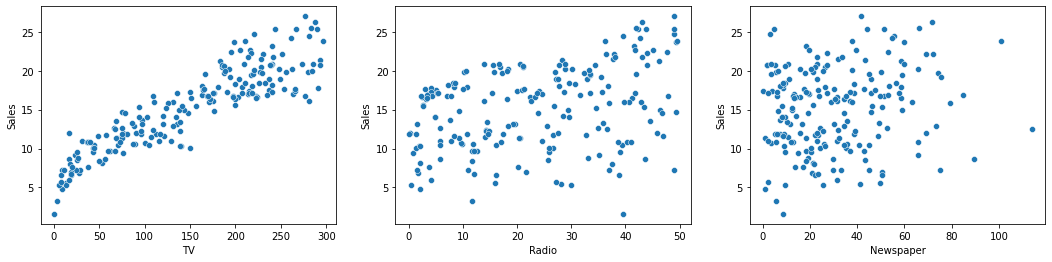

In [3]:
fig, axis = plt.subplots(1, 3, figsize=(18, 4))
sns.scatterplot(data = df, x="TV", y = "Sales", ax=axis[0])
sns.scatterplot(data = df, x="Radio", y = "Sales", ax=axis[1])
sns.scatterplot(data = df, x="Newspaper", y = "Sales", ax=axis[2])

Kiểm tra và loại bỏ dữ liệu ngoại lai

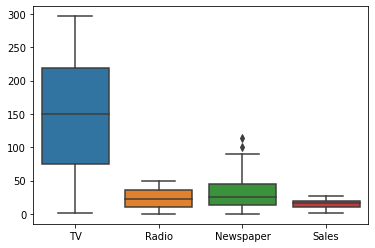

In [4]:
sns.boxplot(data=df)

Xử lý dữ liệu

kiểm tra khuyết thuyết

In [5]:
coll_na = df.columns[df.isnull().any()]


# Xử lý các cột dữ liệu

# Tìm dữ liệu đa công tuyến

Bước 1: Tính độ tương quan<br>
Bước 2: Nếu có có tính đa công tuyến<br>
Tìm tương quan

In [6]:
y = df["Sales"]
df_iv = df.drop("Sales", axis=1)

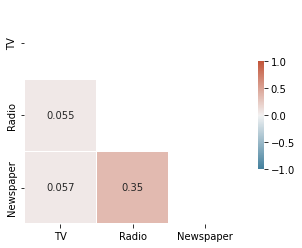

In [7]:
df_cor = df_iv.corr(method="pearson")

# Tạo ra mặt nạ loại bỏ tam giá cái 1/2 phần trên của heatmap
mask = np.triu(np.ones_like(df_cor, dtype=bool))

# Tạo bảng màu đẹp hơn
cmap =  sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_cor, vmin=-1, vmax=1, mask=mask, cmap=cmap, center=0, annot=True , square=True, linewidths=0.5, cbar_kws={"shrink": 0.5, "orientation": "vertical"})


Chú ý chỉ số tương quan pearson có giá trị từ -1 đến 1

Càng gần 0 thì càng không tương quan<br>
Càng gần 1 hoặc -1 thì càng tương quan. ==>Kết luận: Các biến độc lập không có tương quan, nên không không đa công tuyến<br>
Bước 5: Xử lý biến độc lập

Bước 6: Xây dựng mô hình hồi quy tuyến tính

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_iv, y, test_size=0.2, random_state=42)

In [9]:
model_r = LinearRegression()
model_r.fit(X_train, y_train)

LinearRegression()

In [11]:
scr = model_r.score(X_test, y_test)
scr

0.9059011844150826

In [12]:
y_pred = model_r.predict(X_test)

In [13]:
print("y_pred", y_pred)
print("y_test", y_test.to_numpy())


y_pred [17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]
y_test [16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 16.5 16.1 11.   8.7 16.9  5.3
 10.3 16.7  5.5 16.6 11.3 18.9 19.7 12.5 10.9 22.2 11.3  8.1 21.7 13.4
 10.6  5.7 15.6 11.3 23.7  8.7 16.1 20.7 11.6 20.8 11.9  6.9]
